# CMP6202 Classification Project
**Author:**Swostika Shrestha



## 1. Imports

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from imblearn.over_sampling import SMOTE
from scipy.stats import pointbiserialr


## 2. Load Data

In [16]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 3. Exploratory Data Analysis (EDA)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

sns.set(style="whitegrid")

In [18]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


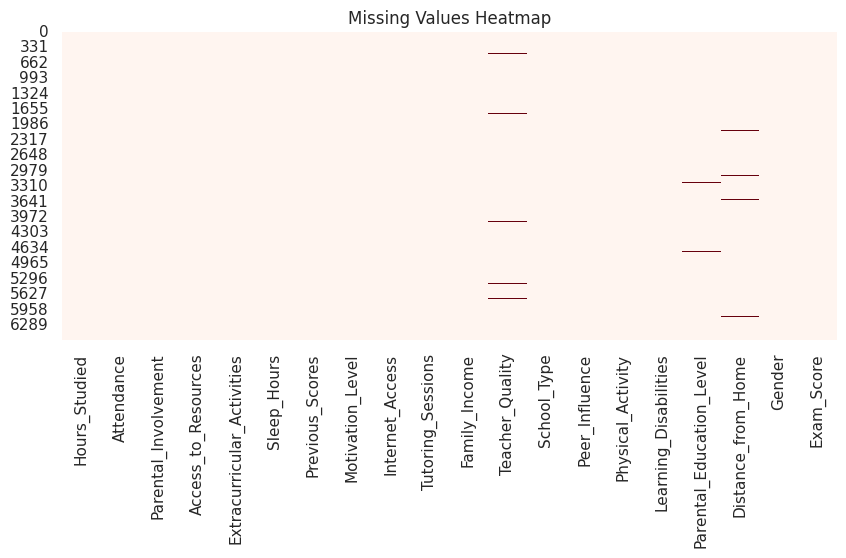

In [19]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

In [20]:
display(df.describe(include='all'))


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


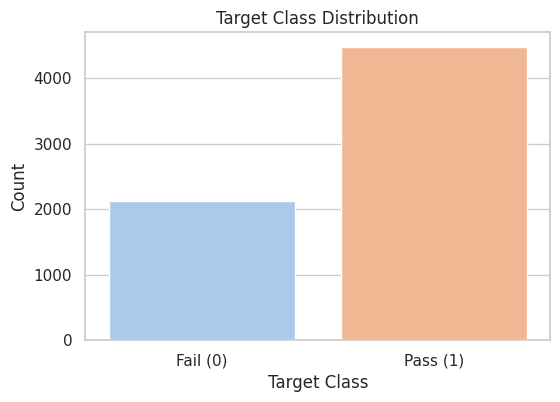

In [21]:
# Recreate the 'Target' column after reloading the data
df['Target'] = df['Exam_Score'].apply(lambda x: 1 if x >= 66 else 0)

target_counts = df['Target'].value_counts().sort_index()
target_labels = ['Fail (0)' if i == 0 else 'Pass (1)' for i in target_counts.index]
target_df = pd.DataFrame({'Target': target_labels, 'Count': target_counts.values})

plt.figure(figsize=(6, 4))
sns.barplot(
    data=target_df,
    x='Target',
    y='Count',
    hue='Target',
    palette='pastel',
    legend=False
)
plt.title("Target Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

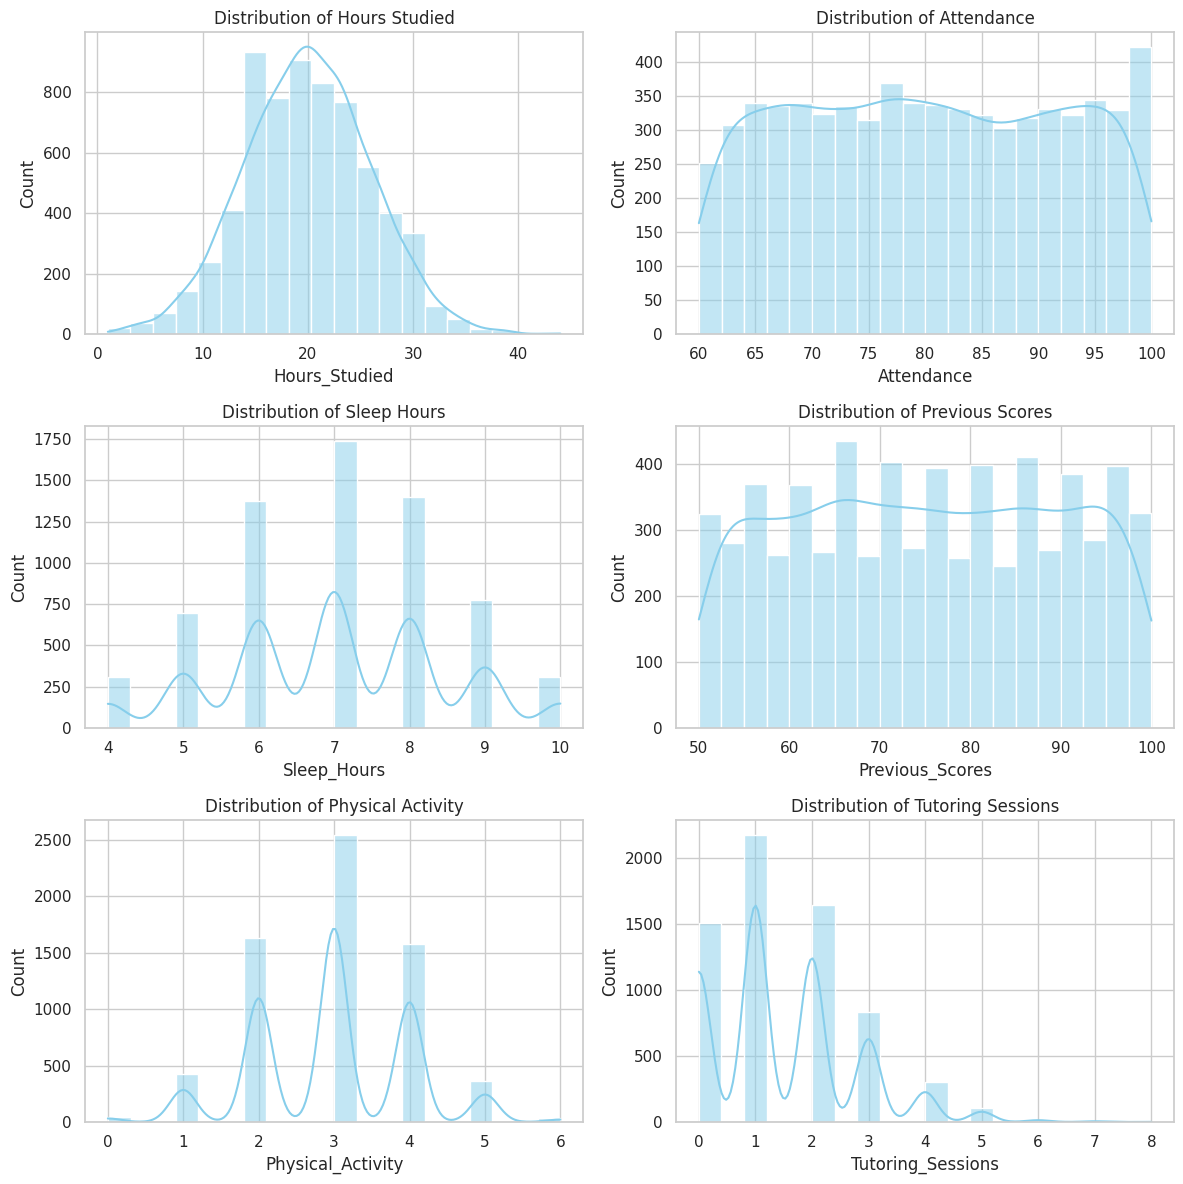

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(df['Hours_Studied'], kde=True, ax=axes[0, 0], color='skyblue', bins=20)
axes[0, 0].set_title('Distribution of Hours Studied')

sns.histplot(df['Attendance'], kde=True, ax=axes[0, 1], color='skyblue', bins=20)
axes[0, 1].set_title('Distribution of Attendance')

sns.histplot(df['Sleep_Hours'], kde=True, ax=axes[1, 0], color='skyblue', bins=20)
axes[1, 0].set_title('Distribution of Sleep Hours')

sns.histplot(df['Previous_Scores'], kde=True, ax=axes[1, 1], color='skyblue', bins=20)
axes[1, 1].set_title('Distribution of Previous Scores')

sns.histplot(df['Physical_Activity'], kde=True, ax=axes[2, 0], color='skyblue', bins=20)
axes[2, 0].set_title('Distribution of Physical Activity')

sns.histplot(df['Tutoring_Sessions'], kde=True, ax=axes[2, 1], color='skyblue', bins=20)
axes[2, 1].set_title('Distribution of Tutoring Sessions')

plt.tight_layout()

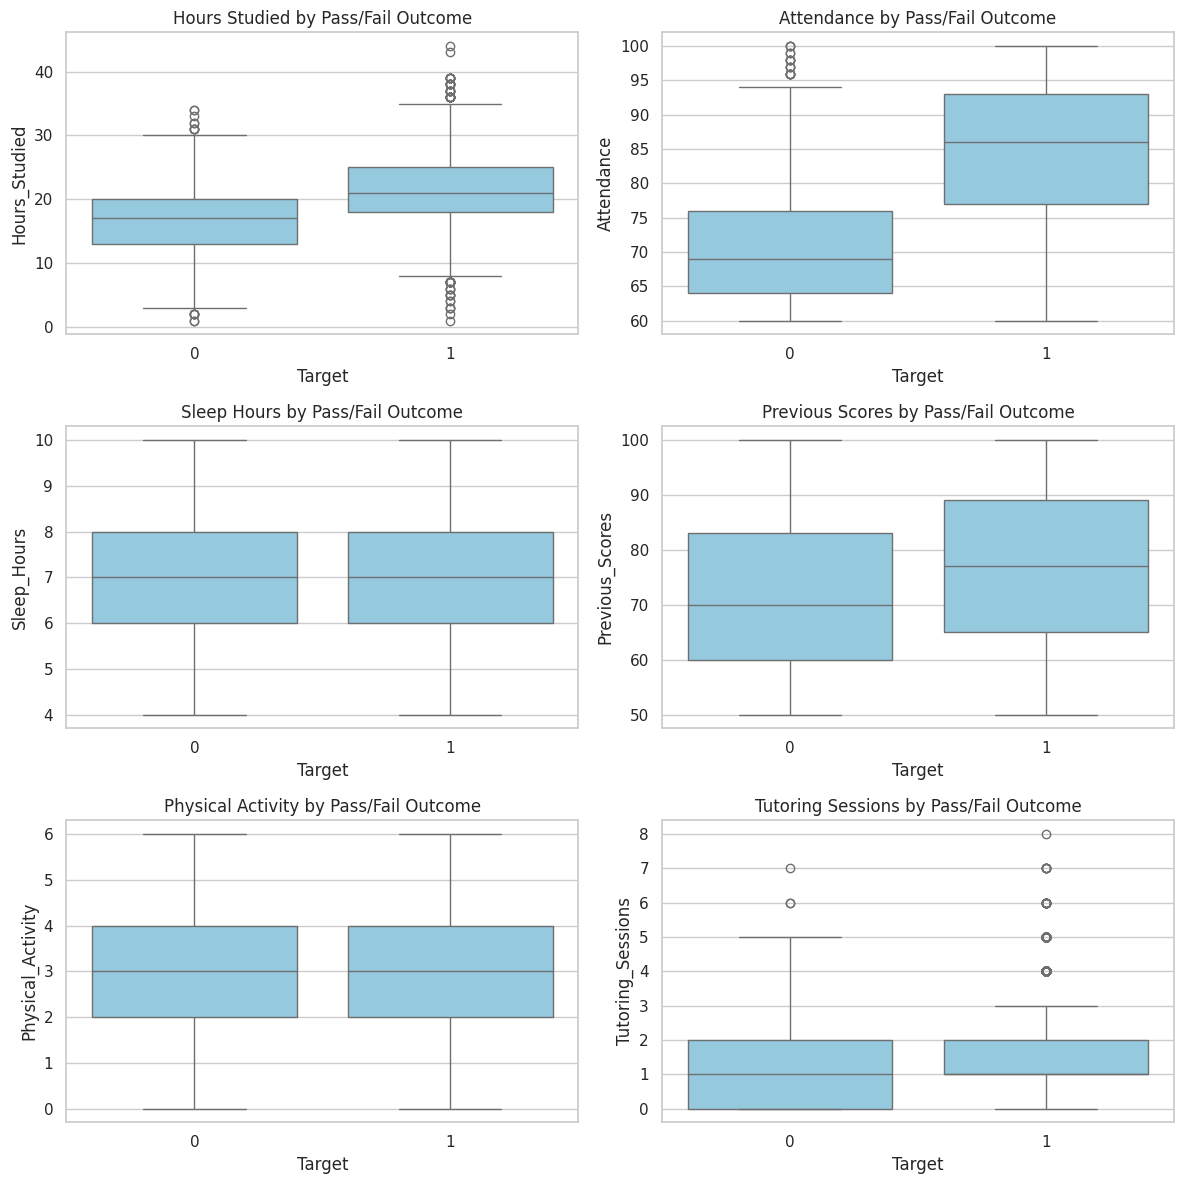

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.boxplot(x='Target', y='Hours_Studied', data=df, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Hours Studied by Pass/Fail Outcome')

sns.boxplot(x='Target', y='Attendance', data=df, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Attendance by Pass/Fail Outcome')

sns.boxplot(x='Target', y='Sleep_Hours', data=df, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Sleep Hours by Pass/Fail Outcome')

sns.boxplot(x='Target', y='Previous_Scores', data=df, ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Previous Scores by Pass/Fail Outcome')

sns.boxplot(x='Target', y='Physical_Activity', data=df, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Physical Activity by Pass/Fail Outcome')

sns.boxplot(x='Target', y='Tutoring_Sessions', data=df, ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Tutoring Sessions by Pass/Fail Outcome')

plt.tight_layout()

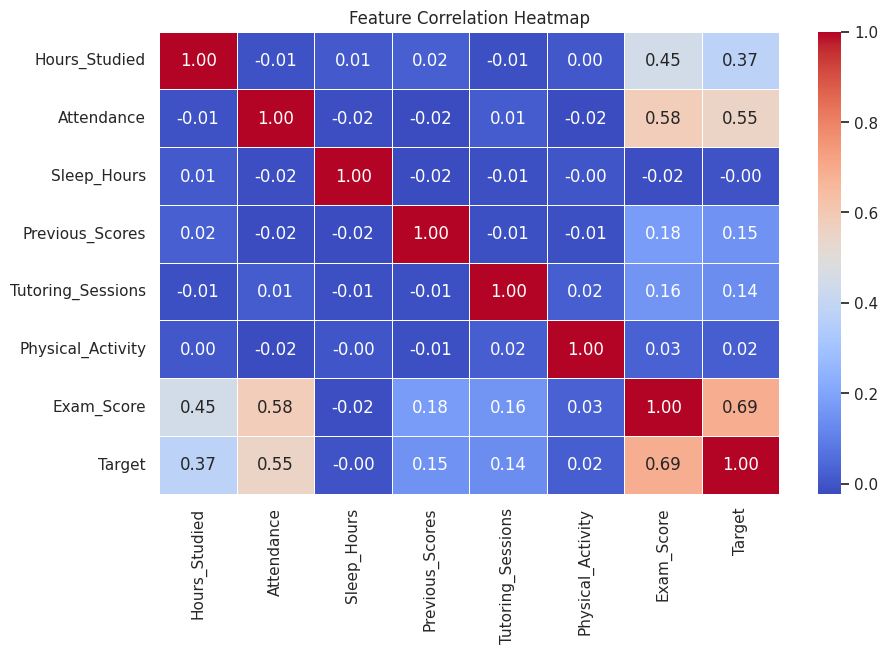

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Point-Biserial Correlation (Numeric Features vs. Binary Target)
corrs = {}
for col in df.select_dtypes(include='number').columns:
    if col not in ('Exam_Score', 'Target'):
        corr, _ = pointbiserialr(df[col], df['Target'])
        corrs[col] = abs(corr)
corr_series = pd.Series(corrs).sort_values(ascending=False)

print("Absolute point-biserial correlations with Target:")
display(corr_series)

Absolute point-biserial correlations with Target:


,0
Attendance,0.550211
Hours_Studied,0.374075
Previous_Scores,0.151370
Tutoring_Sessions,0.136864
Physical_Activity,0.021345
Sleep_Hours,0.004207


## 4. Data Preprocessing (SMOTE & Feature Selection)

Raw shapes before SMOTE:
  Train: (3826, 18) {1: 2599, 0: 1227}
  Validation: (1276, 18) {1: 866, 0: 410}
  Test: (1276, 18) {1: 867, 0: 409}

After SMOTE (only on Train):
  Train: (5198, 18) {0: 2599, 1: 2599}


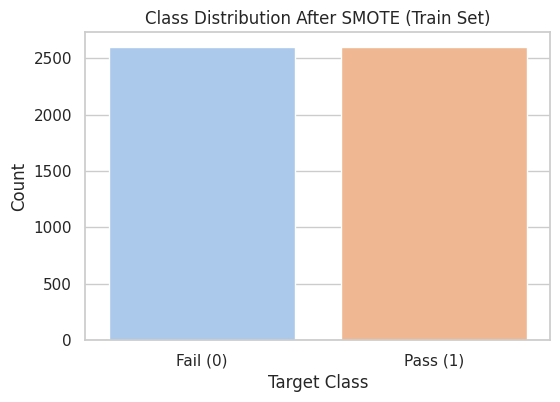


Final dataset shapes:
  X_train: (5198, 18) y_train: (5198,)
  X_val:   (1276, 18) y_val: (1276,)
  X_test:  (1276, 18) y_test: (1276,)


In [26]:

df = pd.read_csv("StudentPerformanceFactors.csv")
df['Target'] = df['Exam_Score'].apply(lambda x: 1 if x >= 66 else 0)
df = df.drop(columns=['Exam_Score'])

df = df.dropna().copy()

df = df.drop(columns=['Previous_Scores'])

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Target'])
y = df['Target']

X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(
    X_temp_raw, y_temp_raw, test_size=0.5, random_state=42, stratify=y_temp_raw
)

print("Raw shapes before SMOTE:")
print("  Train:", X_train_raw.shape, y_train_raw.value_counts().to_dict())
print("  Validation:", X_val_raw.shape, y_val_raw.value_counts().to_dict())
print("  Test:", X_test_raw.shape, y_test_raw.value_counts().to_dict())

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_raw, y_train_raw)

print("\nAfter SMOTE (only on Train):")
print("  Train:", X_train_smote.shape, pd.Series(y_train_smote).value_counts().to_dict())


plt.figure(figsize=(6, 4))
smote_counts = pd.Series(y_train_smote).value_counts().sort_index()
smote_labels = ['Fail (0)', 'Pass (1)']
smote_df = pd.DataFrame({'Target': smote_labels, 'Count': smote_counts.values})
sns.barplot(data=smote_df, x='Target', y='Count', hue='Target', palette='pastel', legend=False)
plt.title("Class Distribution After SMOTE (Train Set)")
plt.ylabel("Count")
plt.xlabel("Target Class")
plt.show()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_smote)
X_val   = scaler.transform(X_val_raw)
X_test  = scaler.transform(X_test_raw)

y_train = y_train_smote.values
y_val   = y_val_raw.values
y_test  = y_test_raw.values

print("\nFinal dataset shapes:")
print("  X_train:", X_train.shape, "y_train:", y_train.shape)
print("  X_val:  ", X_val.shape,   "y_val:",   y_val.shape)
print("  X_test: ", X_test.shape,  "y_test:",  y_test.shape)


## 5. Model Selection & Training


=== Logistic Regression ===
Train Accuracy:      0.89
Validation Accuracy: 0.87
Test Accuracy:       0.87

Classification Report (Test Set):
              precision    recall  f1-score   support

    Fail (0)       0.77      0.84      0.80       409
    Pass (1)       0.92      0.88      0.90       867

    accuracy                           0.87      1276
   macro avg       0.84      0.86      0.85      1276
weighted avg       0.87      0.87      0.87      1276



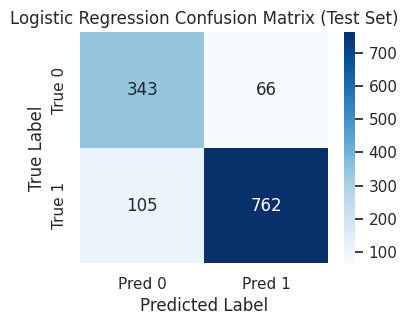

------------------------------------------------------------

=== Random Forest ===
Train Accuracy:      0.78
Validation Accuracy: 0.76
Test Accuracy:       0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

    Fail (0)       0.58      0.85      0.69       409
    Pass (1)       0.91      0.71      0.80       867

    accuracy                           0.75      1276
   macro avg       0.74      0.78      0.74      1276
weighted avg       0.80      0.75      0.76      1276



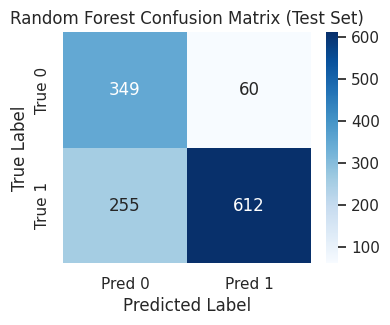

------------------------------------------------------------

=== Linear SVM ===
Train Accuracy:      0.90
Validation Accuracy: 0.87
Test Accuracy:       0.87

Classification Report (Test Set):
              precision    recall  f1-score   support

    Fail (0)       0.77      0.84      0.81       409
    Pass (1)       0.92      0.88      0.90       867

    accuracy                           0.87      1276
   macro avg       0.85      0.86      0.85      1276
weighted avg       0.88      0.87      0.87      1276



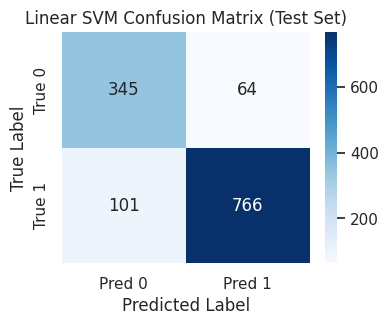

------------------------------------------------------------

Summary of Train / Validation / Test Accuracies:


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,Logistic Regression,0.894767,0.873041,0.865987
1,Random Forest,0.777222,0.760972,0.753135
2,Linear SVM,0.896499,0.874608,0.870690


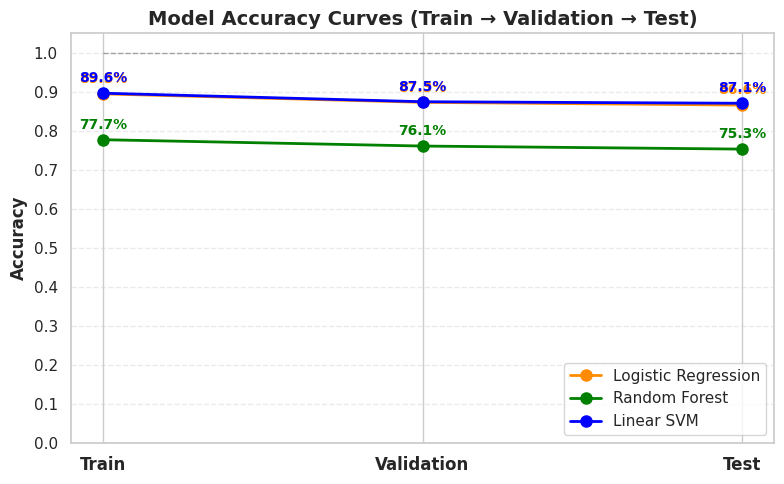

In [27]:

models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2', C=0.005, max_iter=500, solver='liblinear', random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=10, max_depth=1, min_samples_leaf=50, max_features='sqrt', random_state=42
    ),
    "Linear SVM": SVC(
        kernel='linear', C=0.005, probability=True, random_state=42
    )
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)
    y_test_pred  = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc   = accuracy_score(y_val, y_val_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": val_acc,
        "Test Accuracy": test_acc
    })

    print(f"\n=== {name} ===")
    print(f"Train Accuracy:      {train_acc:.2f}")
    print(f"Validation Accuracy: {val_acc:.2f}")
    print(f"Test Accuracy:       {test_acc:.2f}\n")

    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, target_names=['Fail (0)', 'Pass (1)']))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
    plt.title(f"{name} Confusion Matrix (Test Set)")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    print("-" * 60)

results_df = pd.DataFrame(results)
print("\nSummary of Train / Validation / Test Accuracies:")
display(results_df)

labels       = results_df["Model"].tolist()
train_scores = results_df["Train Accuracy"].tolist()
val_scores   = results_df["Validation Accuracy"].tolist()
test_scores  = results_df["Test Accuracy"].tolist()

x = np.array([0, 1, 2])
x_labels = ["Train", "Validation", "Test"]

plt.figure(figsize=(8, 5))
for i, model_name in enumerate(labels):
    scores = [train_scores[i], val_scores[i], test_scores[i]]
    color = ["darkorange", "green", "blue"][i]
    plt.plot(x, scores, marker='o', markersize=8, linewidth=2, color=color, label=model_name)
    for xi, yi in zip(x, scores):
        plt.text(xi, yi + 0.02, f"{yi*100:.1f}%", ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color=color)

plt.hlines([0, 1], xmin=0, xmax=2, colors="grey", linestyles="--", linewidth=1, alpha=0.7)

plt.xticks(x, x_labels, fontsize=12, fontweight='bold')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.05)
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Model Accuracy Curves (Train → Validation → Test)", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 6. Evaluation Metrics & ROC Curves


=== Logistic Regression ===
Test Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.77      0.84      0.80       409
    Pass (1)       0.92      0.88      0.90       867

    accuracy                           0.87      1276
   macro avg       0.84      0.86      0.85      1276
weighted avg       0.87      0.87      0.87      1276


=== Random Forest ===
Test Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.58      0.85      0.69       409
    Pass (1)       0.91      0.71      0.80       867

    accuracy                           0.75      1276
   macro avg       0.74      0.78      0.74      1276
weighted avg       0.80      0.75      0.76      1276


=== Linear SVM ===
Test Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

    Fail (0)       0.77      0.84      0.81       409
    Pass (1)       0.92      0.88   

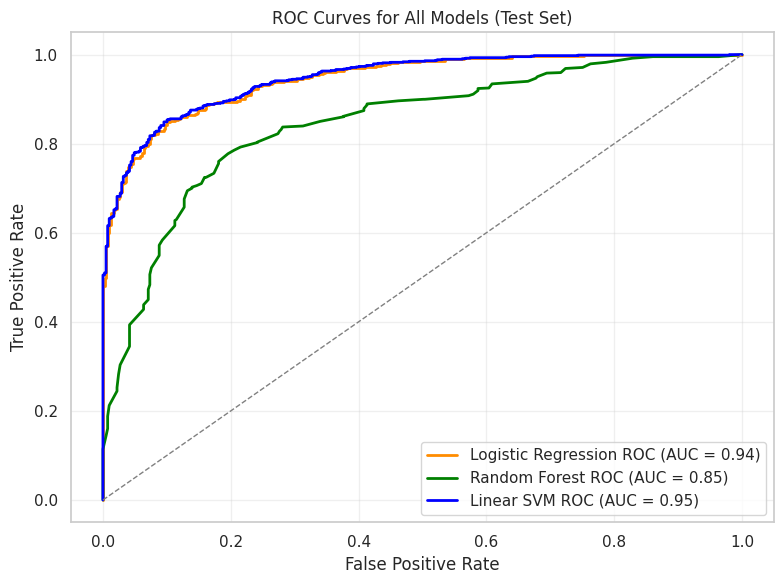

In [28]:

plt.figure(figsize=(8, 6))
colors = {
    "Logistic Regression": "darkorange",
    "Random Forest":       "green",
    "Linear SVM":          "blue"
}

for name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"\n=== {name} ===")
    print(f"Test Accuracy: {test_acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Fail (0)', 'Pass (1)']))

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, lw=2, color=colors[name], label=f"{name} ROC (AUC = {roc_auc:.2f})")
    else:
        print(f"{name} does not support predict_proba, skipping ROC plot.")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--", lw=1)
plt.title("ROC Curves for All Models (Test Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Cross-Validation (10-Fold)


=== Logistic Regression 10-Fold CV Results ===
accuracy       : 0.894 ± 0.012
precision_macro: 0.895 ± 0.011
recall_macro   : 0.894 ± 0.012
f1_macro       : 0.894 ± 0.012
roc_auc        : 0.961 ± 0.004

=== Random Forest 10-Fold CV Results ===
accuracy       : 0.779 ± 0.007
precision_macro: 0.787 ± 0.009
recall_macro   : 0.779 ± 0.007
f1_macro       : 0.777 ± 0.007
roc_auc        : 0.866 ± 0.013

=== Linear SVM 10-Fold CV Results ===
accuracy       : 0.895 ± 0.012
precision_macro: 0.896 ± 0.012
recall_macro   : 0.895 ± 0.012
f1_macro       : 0.894 ± 0.012
roc_auc        : 0.962 ± 0.004


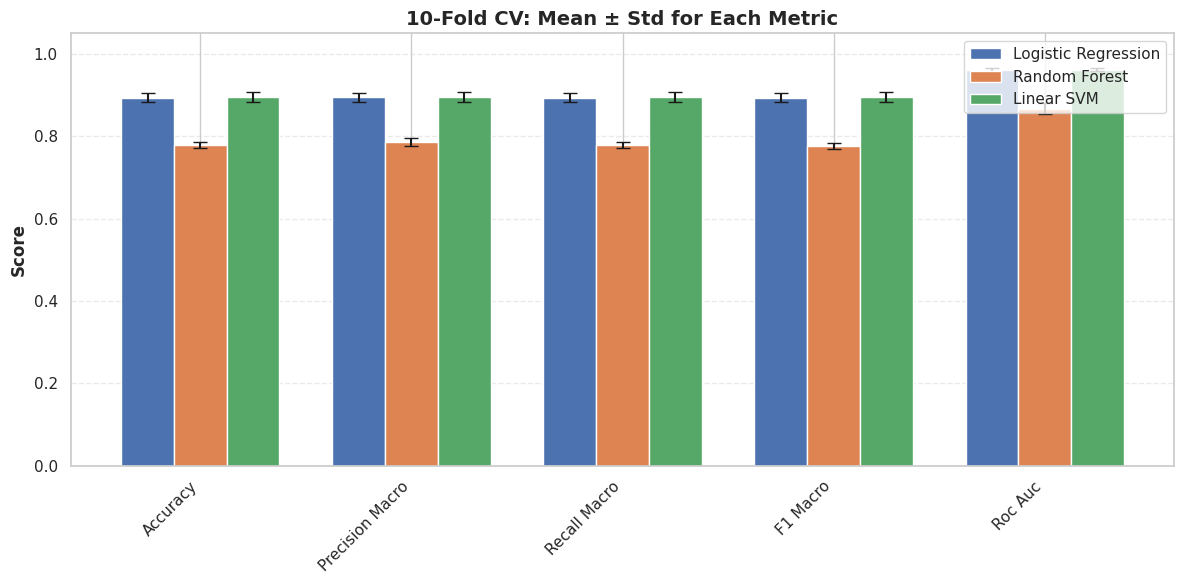

In [29]:

from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc'
}

cv_results_all = {}
for name, model in models.items():
    print(f"\n=== {name} 10-Fold CV Results ===")
    scoring_to_use = scoring.copy()
    if not hasattr(model, "predict_proba"):
        scoring_to_use.pop('roc_auc')

    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring_to_use,
        return_train_score=False
    )
    cv_results_all[name] = cv_results

    for metric_key, values in cv_results.items():
        if metric_key.startswith('test_'):
            metric_name = metric_key.replace('test_', '')
            mean_score = np.mean(values)
            std_score = np.std(values)
            print(f"{metric_name:<15}: {mean_score:.3f} ± {std_score:.3f}")

metrics_to_plot = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
models_list = list(cv_results_all.keys())

mean_scores = {metric: [] for metric in metrics_to_plot}
std_scores  = {metric: [] for metric in metrics_to_plot}

for metric in metrics_to_plot:
    for name in models_list:
        key = f'test_{metric}'
        if key in cv_results_all[name]:
            vals = cv_results_all[name][key]
            mean_scores[metric].append(np.mean(vals))
            std_scores[metric].append(np.std(vals))
        else:
            mean_scores[metric].append(np.nan)
            std_scores[metric].append(np.nan)

x = np.arange(len(metrics_to_plot))
width = 0.25

plt.figure(figsize=(12, 6))
for i, name in enumerate(models_list):
    means = [mean_scores[m][i] for m in metrics_to_plot]
    errs  = [std_scores[m][i] for m in metrics_to_plot]
    plt.bar(
        x + (i - 1)*width,
        means,
        width,
        yerr=errs,
        capsize=5,
        label=name
    )

plt.xticks(x, [m.replace('_', ' ').title() for m in metrics_to_plot], rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("10-Fold CV: Mean ± Std for Each Metric", fontsize=14, fontweight='bold')
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 8. Hyperparameter Tuning (GridSearchCV)


→ Tuning Logistic Regression ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
  Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
  Best cross-val AUC: 0.963

→ Tuning Random Forest ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
  Best params for Random Forest: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 50}
  Best cross-val AUC: 0.933

→ Tuning Linear SVM ...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
  Best params for Linear SVM: {'C': 0.05, 'kernel': 'linear', 'probability': True}
  Best cross-val AUC: 0.963


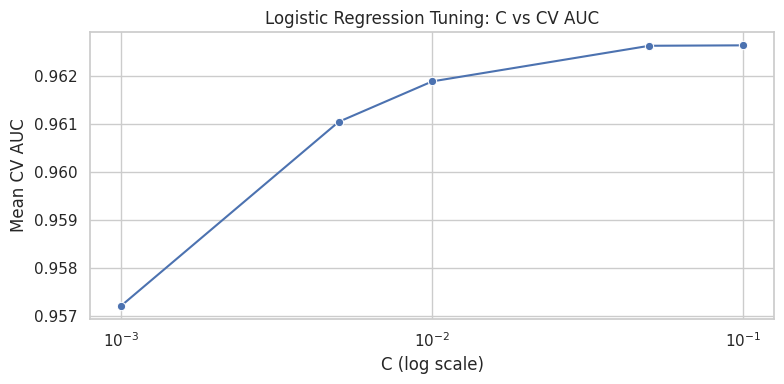

<Figure size 800x400 with 0 Axes>

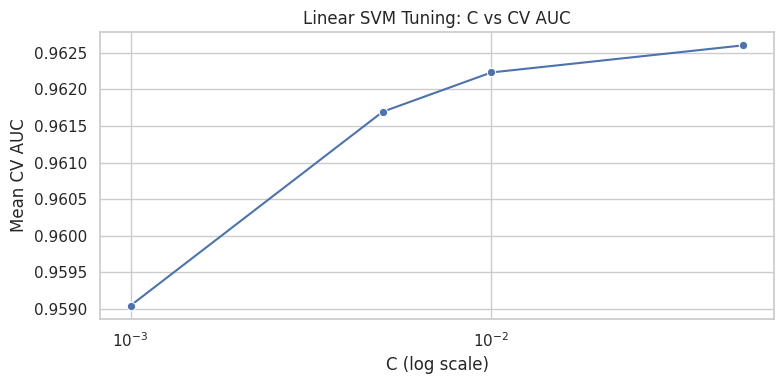


=== Performance of Tuned Models ===

--- Logistic Regression ---
Validation Accuracy: 0.878  •  Validation AUC: 0.956
Test Accuracy:       0.866  •  Test AUC:       0.948
Classification Report (Test Set):
              precision    recall  f1-score   support

    Fail (0)       0.77      0.83      0.80       409
    Pass (1)       0.92      0.88      0.90       867

    accuracy                           0.87      1276
   macro avg       0.84      0.86      0.85      1276
weighted avg       0.87      0.87      0.87      1276


--- Random Forest ---
Validation Accuracy: 0.831  •  Validation AUC: 0.921
Test Accuracy:       0.824  •  Test AUC:       0.909
Classification Report (Test Set):
              precision    recall  f1-score   support

    Fail (0)       0.69      0.81      0.75       409
    Pass (1)       0.90      0.83      0.86       867

    accuracy                           0.82      1276
   macro avg       0.80      0.82      0.81      1276
weighted avg       0.84      0.8

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
rf_param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [30, 50, 70],
    'max_features': ['sqrt']
}
svm_param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05],
    'kernel': ['linear'],
    'probability': [True]
}

lr_base = LogisticRegression(random_state=42, max_iter=500)
rf_base = RandomForestClassifier(random_state=42)
svm_base = SVC(random_state=42, probability=True)

grid_searches = {
    'Logistic Regression': GridSearchCV(
        lr_base, lr_param_grid, scoring='roc_auc', cv=cv_splitter,
        n_jobs=-1, verbose=1, return_train_score=True
    ),
    'Random Forest': GridSearchCV(
        rf_base, rf_param_grid, scoring='roc_auc', cv=cv_splitter,
        n_jobs=-1, verbose=1, return_train_score=True
    ),
    'Linear SVM': GridSearchCV(
        svm_base, svm_param_grid, scoring='roc_auc', cv=cv_splitter,
        n_jobs=-1, verbose=1, return_train_score=True
    )
}

best_estimators = {}
grid_search_results = {}

for name, gs in grid_searches.items():
    print(f"\n→ Tuning {name} ...")
    gs.fit(X_train, y_train)
    best_estimators[name] = gs.best_estimator_
    grid_search_results[name] = gs.cv_results_
    print(f"  Best params for {name}: {gs.best_params_}")
    print(f"  Best cross-val AUC: {gs.best_score_:.3f}")

for name, cv_res in grid_search_results.items():
    df_params = pd.DataFrame(cv_res['params'])
    df_params['mean_test_score'] = cv_res['mean_test_score']

    plt.figure(figsize=(8, 4))

    if name == 'Logistic Regression':
        sns.lineplot(x='C', y='mean_test_score', data=df_params, marker='o')
        plt.xscale('log')
        plt.title(f"{name} Tuning: C vs CV AUC")
        plt.xlabel("C (log scale)")
        plt.ylabel("Mean CV AUC")

    elif name == 'Linear SVM':
        sns.lineplot(x='C', y='mean_test_score', data=df_params, marker='o')
        plt.xscale('log')
        plt.title(f"{name} Tuning: C vs CV AUC")
        plt.xlabel("C (log scale)")
        plt.ylabel("Mean CV AUC")

    plt.tight_layout()
    plt.show()

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("\n=== Performance of Tuned Models ===")
for name, model in best_estimators.items():
    y_val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]) if hasattr(model, "predict_proba") else None

    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None

    print(f"\n--- {name} ---")
    print(f"Validation Accuracy: {val_acc:.3f}", end="")
    if val_auc is not None:
        print(f"  •  Validation AUC: {val_auc:.3f}")
    else:
        print()
    print(f"Test Accuracy:       {test_acc:.3f}", end="")
    if test_auc is not None:
        print(f"  •  Test AUC:       {test_auc:.3f}")
    else:
        print()
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, target_names=['Fail (0)', 'Pass (1)']))
